# Facebook Prophet

https://facebook.github.io/prophet/docs/quick_start.html

Prophet is an additive regression model that includes a number of hight advanced, intelligent forecasting methods, including changepoint analysis:
- A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
- A yearly seasonal component modeled using Fourier series.
- A weekly seasonal component using dummy variables. 
- A user-provided list of important holidays.

Because it's built in **Stan**, it's very fast, and functionality/code translates between R and Python.

Prophet is optimized for the business forecast tasks which typically have any of the following characteristics.
- Hourly, daily, or weekly observations with at least a few months (preferably a year) of history.
- Strong multiple "human-scale" seasonalitities: day of week and time of year.
- Important holidays that occur at irregular intervals that are known in advance.
- A reasonable number of missing observations or large ourliers.
- Historical trend changes, for instance due to product launches or logging changes.
- Trends that are non-linear growth curves, where a trend hits a natural limit or saturates.

*Technical details behind prophet*: built around a generalized additive model (GAM).

In [24]:
from fbprophet import Prophet
import pandas as pd
%matplotlib inline 

In [2]:
# Read daily page views for the Wikipedia page for Peyton Manning; scraped into hosted CSV
# log data
peyton = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

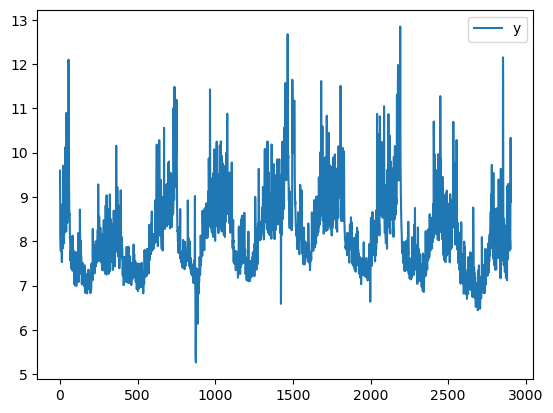

In [3]:
# Plot data
peyton.plot();

It looks like the data is stationary, i.e., the average stays almost the same.

In [4]:
peyton.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
# Fit model
m = Prophet()
m.fit(peyton);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.31    0.00415855       247.015      0.7831      0.7831      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7994.53      0.010249        344.02           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       7995.33   5.91718e-05       165.006   4.517e-07       0.001      316  LS failed, Hessian reset 
     299       7997.26   0.000813407       209.659       6.754      0.6754      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8001.1   0.000792021       147.659      0.5991           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     488       8002.21   7.22552e-05    

In [6]:
# Forecasst 365 days ahead (create time frame)
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)

/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [8]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.042185,8.254760,9.500499,8.042185,8.042185,0.803095,0.803095,0.803095,0.352287,0.352287,0.352287,0.450808,0.450808,0.450808,0.0,0.0,0.0,8.845280
1,2007-12-11,8.040639,7.986237,9.178720,8.040639,8.040639,0.553177,0.553177,0.553177,0.119643,0.119643,0.119643,0.433535,0.433535,0.433535,0.0,0.0,0.0,8.593816
2,2007-12-12,8.039093,7.749197,9.030704,8.039093,8.039093,0.350530,0.350530,0.350530,-0.066668,-0.066668,-0.066668,0.417197,0.417197,0.417197,0.0,0.0,0.0,8.389623
3,2007-12-13,8.037547,7.784737,8.961539,8.037547,8.037547,0.329990,0.329990,0.329990,-0.072250,-0.072250,-0.072250,0.402240,0.402240,0.402240,0.0,0.0,0.0,8.367537
4,2007-12-14,8.036001,7.732644,8.944106,8.036001,8.036001,0.319486,0.319486,0.319486,-0.069583,-0.069583,-0.069583,0.389069,0.389069,0.389069,0.0,0.0,0.0,8.355487


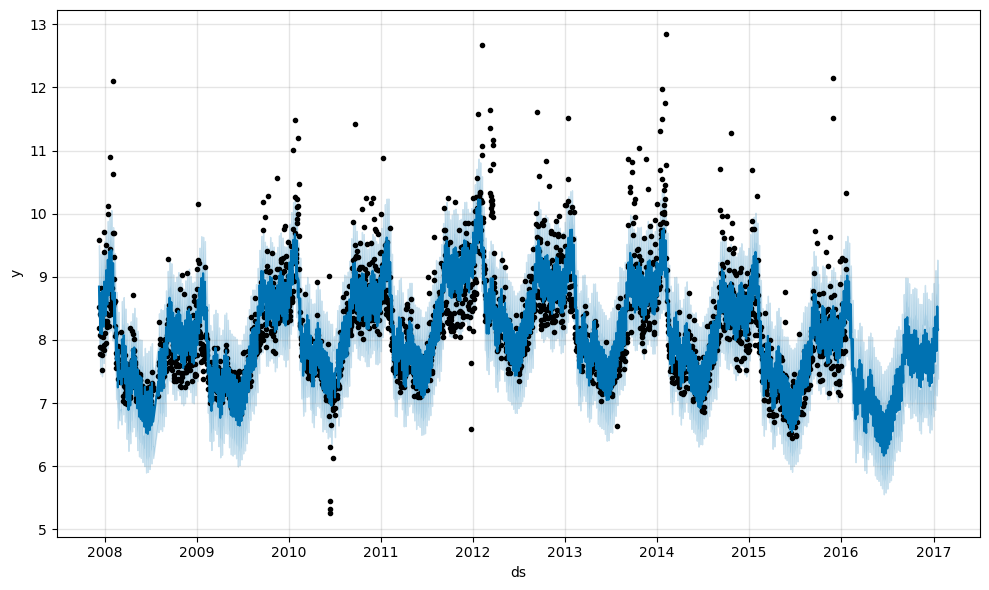

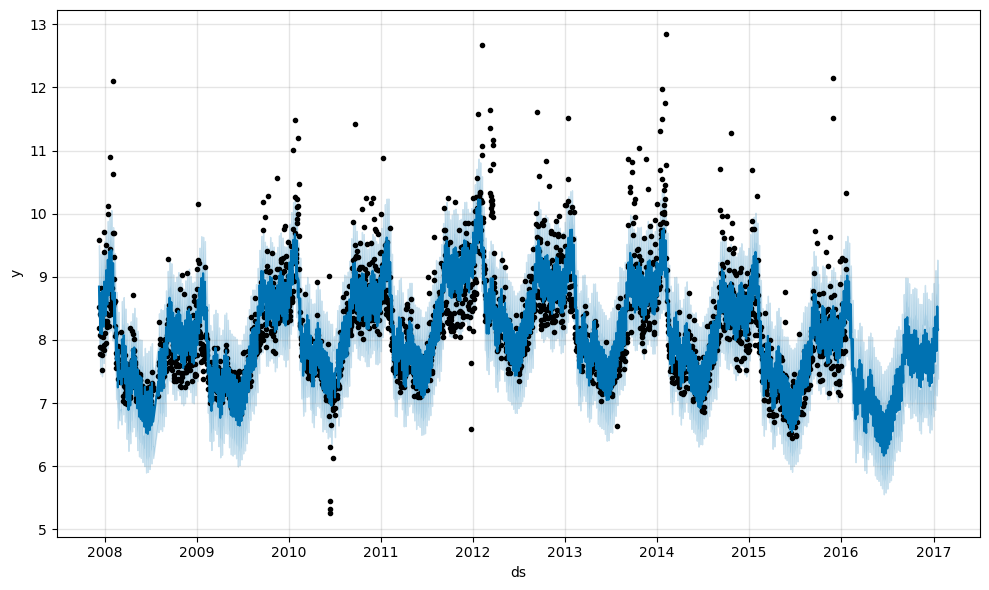

In [10]:
m.plot(forecast)

/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


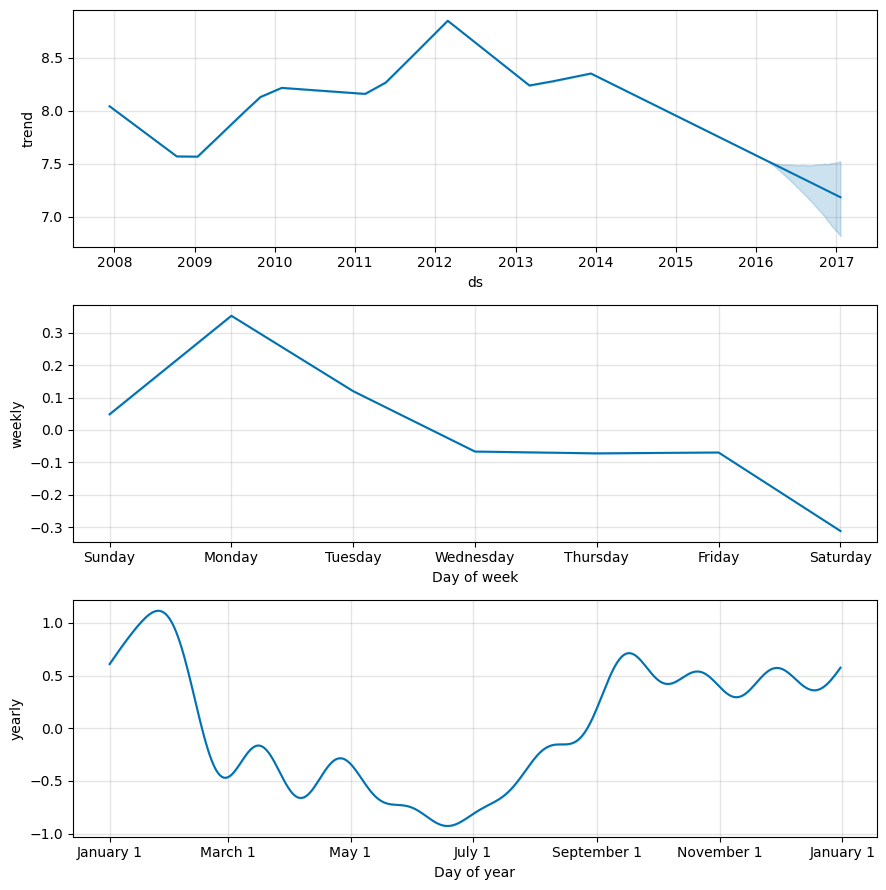

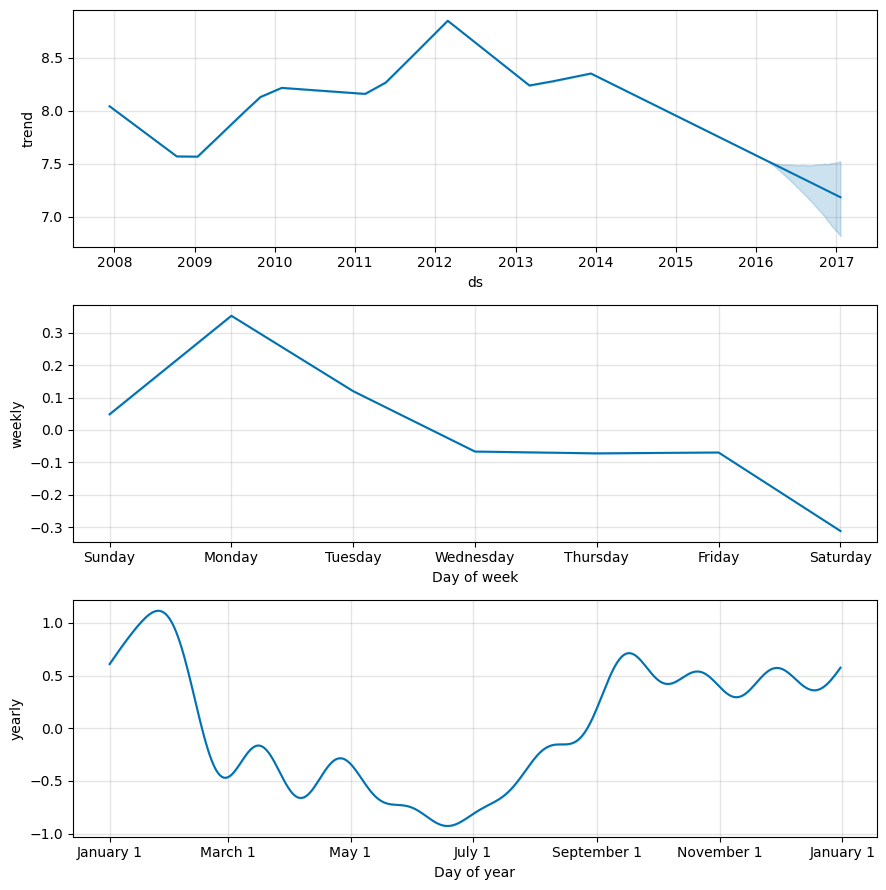

In [11]:
# Plot individual components of forecast: trend, weekly/yearly seasonality
m.plot_components(forecast)

In [12]:
# Add holidays

playoffs = pd.DataFrame({
    'holiday': 'playoff',
    'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                          '2010-01-24', '2010-02-07', '2011-01-08',
                          '2013-01-12', '2014-01-12', '2014-01-19',
                          '2014-02-02', '2015-01-11', '2016-01-17',
                          '2016-01-24', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1
})

superbowls = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1
})

holidays = pd.concat((playoffs, superbowls))

In [13]:
# Fit and predict
m = Prophet(holidays=holidays)
forecast = m.fit(peyton).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8124.57    0.00727282       1156.77      0.4555      0.4555      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8143.49   0.000781922       249.634       1.064      0.1064      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8147.54    0.00047015        118.62      0.3312      0.3312      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8150.87    0.00217008       332.826           1           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     410       8151.16   5.14816e-05       163.707   7.017e-07       0.001      542  LS failed, Hessian reset 
     433       8151.32   3.15547e-05    

/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [14]:
# We can see the effects of various 'holidays' on site visits
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224899,1.200219
2191,2014-02-03,1.905194,1.432725
2532,2015-01-11,1.224899,0.000000
2533,2015-01-12,1.905194,0.000000
2901,2016-01-17,1.224899,0.000000
2902,2016-01-18,1.905194,0.000000
2908,2016-01-24,1.224899,0.000000
2909,2016-01-25,1.905194,0.000000
2922,2016-02-07,1.224899,1.200219
2923,2016-02-08,1.905194,1.432725


/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


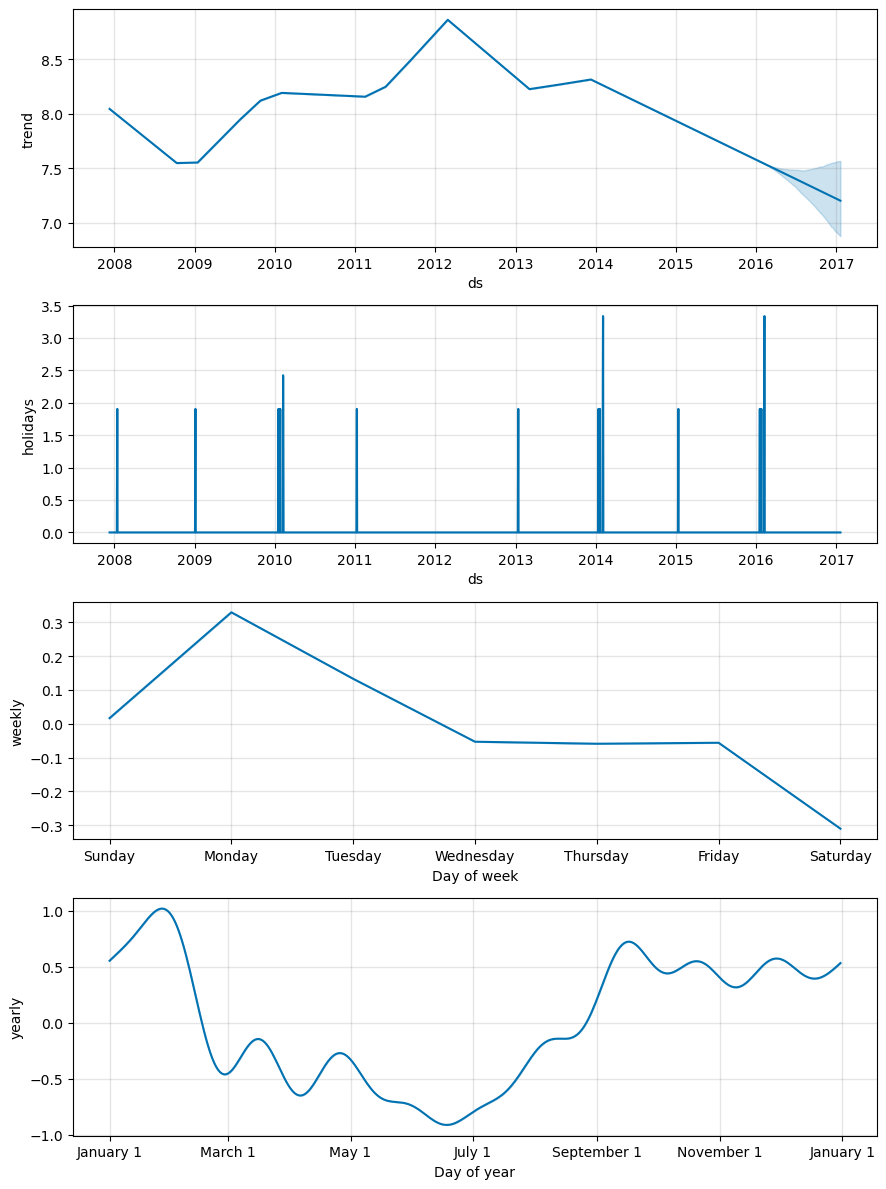

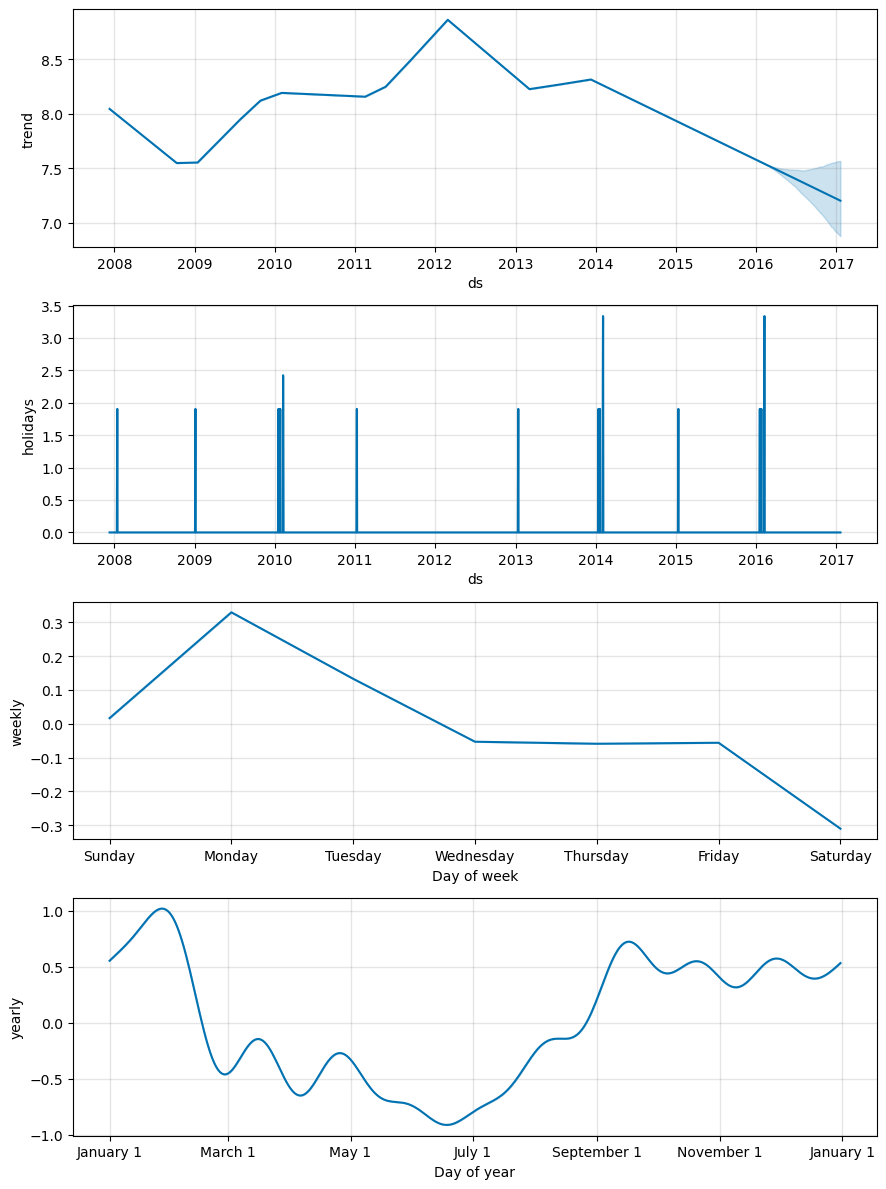

In [15]:
# Check the effects virsually
m.plot_components(forecast)

## Predicting CO2


In [16]:
import statsmodels.api as sm

In [17]:
# Load co2 data, rename headers, and check
data = sm.datasets.co2.load_pandas()
co2 = data.data

co2['ds'] = co2.index
co2.rename(columns={'co2': 'y'}, inplace=True)

co2.tail()

,y,ds
2001-12-01,370.3,2001-12-01
2001-12-08,370.8,2001-12-08
2001-12-15,371.2,2001-12-15
2001-12-22,371.3,2001-12-22
2001-12-29,371.5,2001-12-29


In [18]:
# Fit model
model = Prophet()
model.fit(co2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.22171
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13408.8    0.00342224       55211.9           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       13617.7    0.00180813       15851.4           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       13675.8   0.000112796       20900.2      0.5443      0.5443      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       13706.8   0.000144545       6089.07           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499         13731   5.95648e-05       6942.42      0.3257      0.3257      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

736.03      0.2411           1     1935   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1799       13811.9   4.04493e-06       405.216           1           1     2045   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1899       13812.1   8.10299e-06       519.854           1           1     2156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1943       13812.1   1.62244e-06       251.326           1           1     2206   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [19]:
# Forecast 15 years into future
future = model.make_future_dataframe(periods=120, freq='M', include_history=True) # monthly 
future.tail()

,ds
2399,2011-07-31
2400,2011-08-31
2401,2011-09-30
2402,2011-10-31
2403,2011-11-30


In [20]:
# Populate forecast
forecast = model.predict(future)
forecast.tail()

/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2399,2011-07-31,389.074244,376.836345,400.048411,377.016768,400.074031,-0.178016,-0.178016,-0.178016,-0.178016,-0.178016,-0.178016,0.0,0.0,0.0,388.896228
2400,2011-08-31,389.224118,374.605962,398.114637,376.963314,400.395366,-2.289752,-2.289752,-2.289752,-2.289752,-2.289752,-2.289752,0.0,0.0,0.0,386.934367
2401,2011-09-30,389.369158,373.371743,397.248076,376.910208,400.738517,-3.464507,-3.464507,-3.464507,-3.464507,-3.464507,-3.464507,0.0,0.0,0.0,385.904651
2402,2011-10-31,389.519032,374.036674,398.146677,376.890728,401.029042,-2.714959,-2.714959,-2.714959,-2.714959,-2.714959,-2.714959,0.0,0.0,0.0,386.804073
2403,2011-11-30,389.664072,375.299944,399.859437,376.829559,401.314508,-1.448723,-1.448723,-1.448723,-1.448723,-1.448723,-1.448723,0.0,0.0,0.0,388.215349


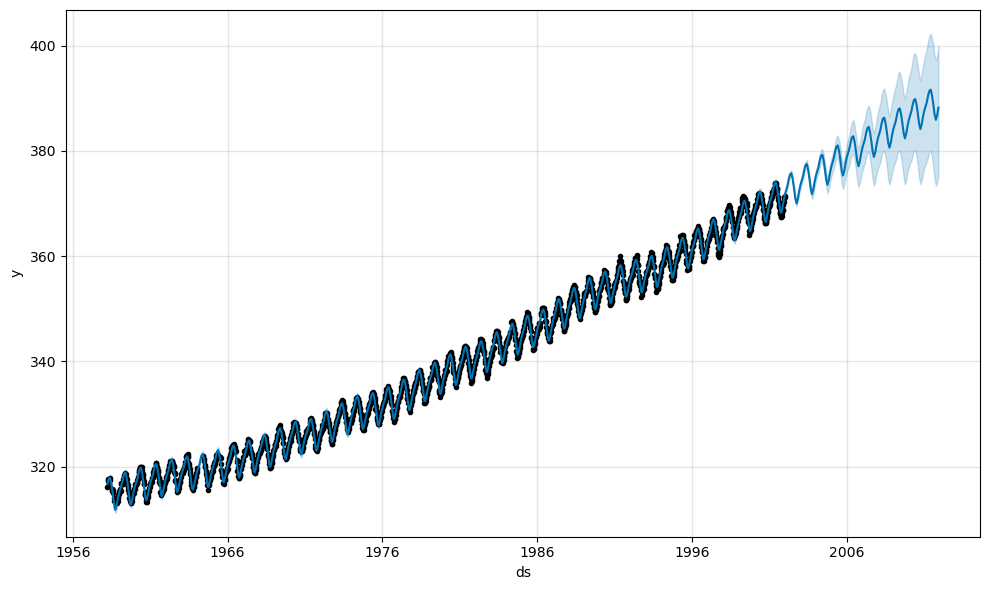

In [21]:
model.plot(forecast);

/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


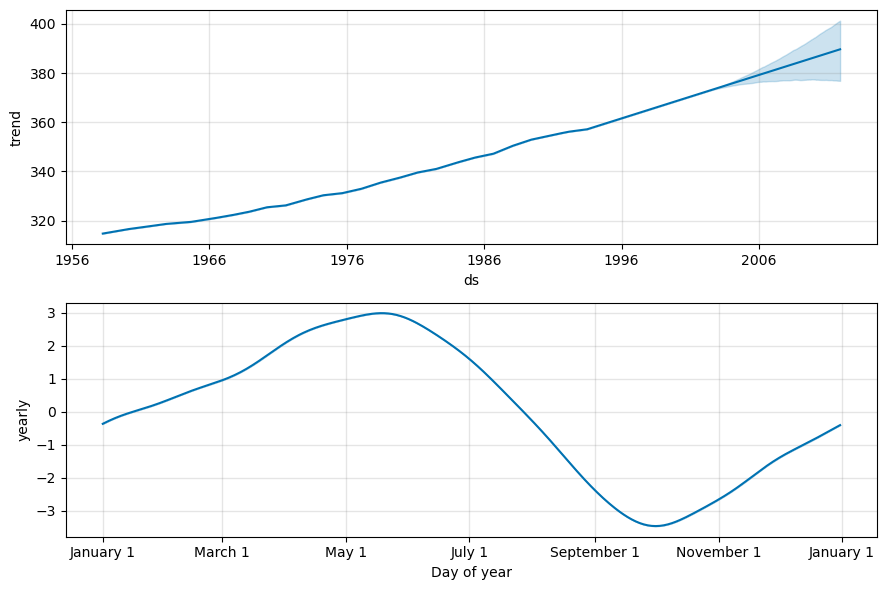

In [22]:
# Plot individual components of forecast: trend, weekly/yearly seasonality
model.plot_components(forecast);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.58883
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       11734.2    0.00091105       5245.44           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       12094.4     0.0047989       3618.43           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       12338.5     0.0423393         14509           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       12458.9   0.000752285       5667.29      0.1386           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       12609.8   0.000939319       6819.72      0.6149      0.6149      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ivy/opt/miniconda3/envs/ml_mac/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


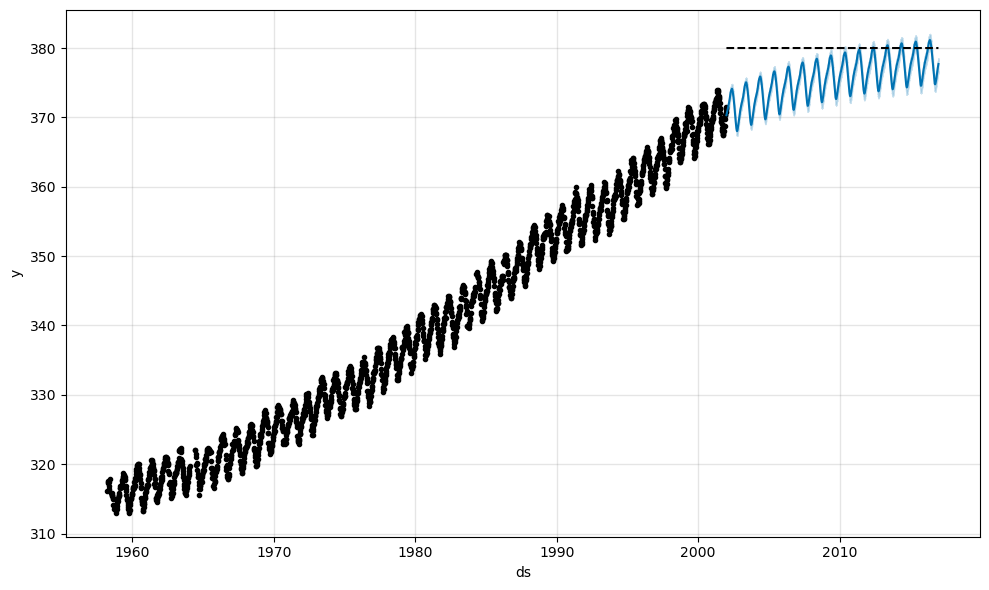

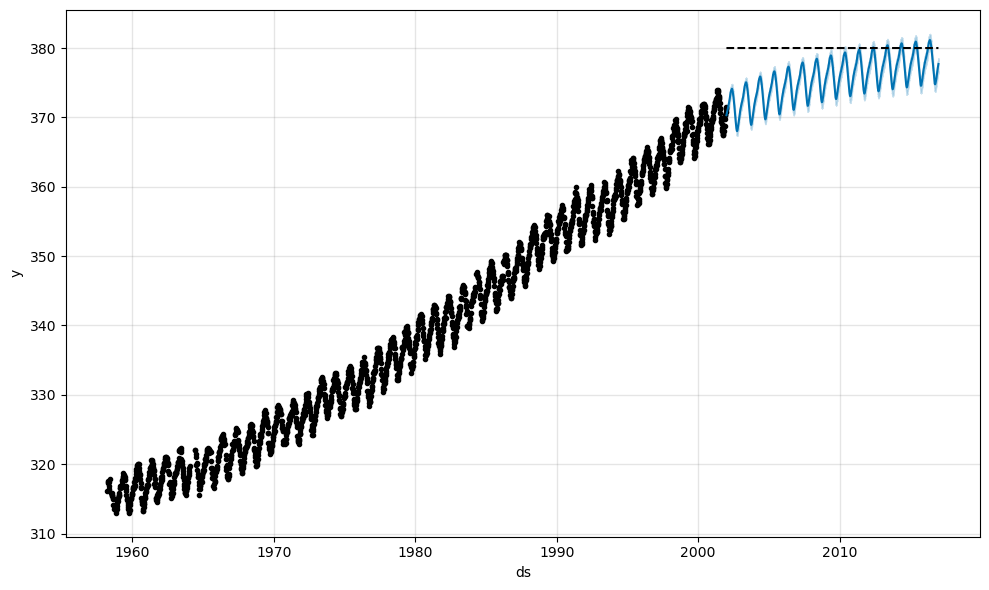

In [25]:
co2['cap'] = 380
m = Prophet(growth='logistic')
m.fit(co2);

future = m.make_future_dataframe(periods=365*15, include_history=False)
future['cap'] = 380

forecast = m.predict(future)
m.plot(forecast)